In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# read data

In [0]:
train_df=pd.read_csv('https://raw.githubusercontent.com/Data-Co-Lab/tutorials/master/Machine%20Learning/Supervised%20Learning/House.csv')

print the first 10 lines of the DataFrame

In [3]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

print the shape of the data

In [4]:
train_df.shape

(1460, 81)

show some statistics about numerical columns

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


select the GrLivArea feature and the target value(PriceSale)

In [6]:
X=train_df[['GrLivArea']]
y=train_df.SalePrice
X.head()

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198


make a scatter plot of GrLivArea and the target value SalePrice

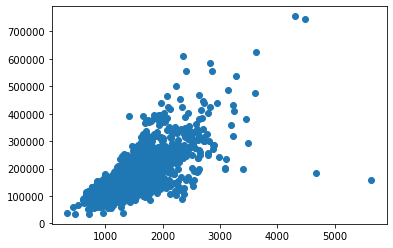

In [7]:
plt.scatter(X,y)

# split the data into train and test

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Specify and Fit the Model

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

# print the coefficients of the model

In [10]:
reg.coef_

array([98.50395317])

# predict

In [11]:
pred=reg.predict(X_test)
pred[:10]

array([135976.25972453, 289051.4029548 , 132036.10159763, 194684.61581542,
       190350.44187582,  92831.52823492, 223250.76223548, 174195.79355551,
        92831.52823492, 167990.04450564])

# evaluate using mae

In [12]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

37583.88288057472

# evaluate using rmse

In [13]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test, pred))
rmse

56577.61139351234

Not so bad given the fact that we used only one variable which is the house size.

make a scatter plot of X_train and y_train using sns.regplot

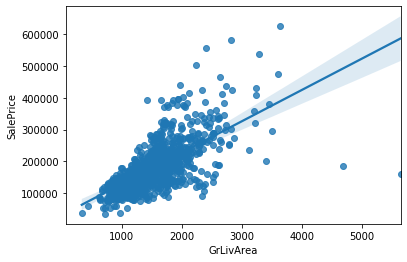

In [14]:
sns.regplot(X_train,y_train)

# remove the outliers and repeat the same process. (use rmse for evaluation)


In [15]:
X=train_df[train_df.GrLivArea< 4000]
y=X.SalePrice
X=X[['GrLivArea']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
preds=reg.predict(X_test)
new_rmse=np.sqrt(mean_squared_error(y_test, preds))
new_rmse

51597.577091024

# Random Forest

we will use only the following columns
* LotArea: Lot size in square feet
* YearBuilt: Original construction date
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* FullBath: Full bathrooms above grade
* BedroomAbvGr:Number of bedrooms above basement level 
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [19]:
feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']
X=train_df[feature_names]
y=train_df.SalePrice
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [20]:
X.isnull().sum()

LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64

## Specify and Fit Model
set n_estimators=200,random_state=1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=500,random_state=1)
# fit
forest_model.fit(X_train, y_train)
# predict
preds = forest_model.predict(X_test)
# evaluate
rmse=np.sqrt(mean_squared_error(y_test,preds))
print("rmse score: {}".format(rmse))

rmse score: 34863.76055321795


In [22]:
forest_model.feature_importances_

array([0.11194723, 0.35850493, 0.31187139, 0.1427113 , 0.01261484,
       0.0179811 , 0.04436921])

# Hyper parameter tuning

In [23]:
# helper function to build a model, predict and evaluate.
def get_rmse(max_depth, X_train, X_test, y_train, y_test):
    forest_model = RandomForestRegressor(n_estimators=200,random_state=1,max_depth=max_depth)
    forest_model.fit(X_train, y_train)
    preds = forest_model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test, preds))
    return(rmse)

candidate_max_depth = list(range(1,13))
# Write loop to find the ideal tree size from candidate_max_depth
rmses=[]
for max_depth in candidate_max_depth:
    rmse=get_rmse(max_depth, X_train, X_test, y_train, y_test)
    print("Max depth: %d  \t\t rmse:  %d" %(max_depth, rmse))
    rmses.append(rmse)
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = candidate_max_depth[np.argmin(rmses)]
print(best_tree_size)

Max depth: 1  		 rmse:  67848
Max depth: 2  		 rmse:  54331
Max depth: 3  		 rmse:  45034
Max depth: 4  		 rmse:  39802
Max depth: 5  		 rmse:  36638
Max depth: 6  		 rmse:  35438
Max depth: 7  		 rmse:  35231
Max depth: 8  		 rmse:  34506
Max depth: 9  		 rmse:  35004
Max depth: 10  		 rmse:  34669
Max depth: 11  		 rmse:  34775
Max depth: 12  		 rmse:  34693
8


In [24]:
forest_model = RandomForestRegressor(n_estimators=200,max_depth=2,random_state=1)
forest_model.fit(X_train, y_train)
preds = forest_model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, preds))
print("rmse score: {}".format(rmse))

rmse score: 54331.0390252423


# Data Cleaning

In [25]:
feature_names = ['LotFrontage','LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']
X=train_df[feature_names]
y=train_df.SalePrice
X.head()

,LotFrontage,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,65.0,8450,2003,856,854,2,3,8
1,80.0,9600,1976,1262,0,2,3,6
2,68.0,11250,2001,920,866,2,3,6
3,60.0,9550,1915,961,756,1,3,7
4,84.0,14260,2000,1145,1053,2,4,9


print sum of nan values for each column

In [26]:
X.isnull().sum()

LotFrontage     259
LotArea           0
YearBuilt         0
1stFlrSF          0
2ndFlrSF          0
FullBath          0
BedroomAbvGr      0
TotRmsAbvGrd      0
dtype: int64

train test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

impute nan values using imputer

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
print("nbr of missing values before using imputer")
print(np.isnan(X_train).sum())
imputer.fit(X_train)
X_train=imputer.transform(X_train)

nbr of missing values before using imputer
LotFrontage     183
LotArea           0
YearBuilt         0
1stFlrSF          0
2ndFlrSF          0
FullBath          0
BedroomAbvGr      0
TotRmsAbvGrd      0
dtype: int64


check nan values again

In [41]:
np.isnan(X_train).sum()

0

# Let's make our life easier with sklearn  pipeline

In [42]:
from sklearn.pipeline import make_pipeline
my_pipeline = make_pipeline(imputer,forest_model)
my_pipeline.fit(X_train,y_train)
preds=my_pipeline.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, preds))
print("rmse score: {}".format(rmse))

rmse score: 54331.0390252423


# cross validation

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
scores =-cross_val_score(my_pipeline,X,y,cv=5,scoring='neg_mean_absolute_error',n_jobs=4)
print(scores)
print(np.average(scores))

[35661.36068853 34021.97758535 36123.26646394 32313.39936532
 37437.63635161]
35111.52809094832


# save the model

In [0]:
feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']
X=train_df[feature_names]
y=train_df.SalePrice

In [45]:
forest_model = RandomForestRegressor(n_estimators=200,max_depth=2,random_state=1)
forest_model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [0]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(forest_model, open(filename, 'wb'))

# Load the model

In [47]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
preds = loaded_model.predict(X)
rmse=np.sqrt(mean_squared_error(y, preds))
print("rmse score: {}".format(rmse))

rmse score: 50369.06840797426
